***Question 1***<br>

Find some dataset with at least four variables and at least 100 cases and apply clustering to the dataset. Make sure to address the following:<br>
•	Data cleaning where necessary<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://archive.ics.uci.edu/ml/datasets/seeds

1. area A,<br>
2. perimeter P,<br>
3. compactness C = 4*pi*A/P^2,<br>
4. length of kernel,<br>
5. width of kernel,<br>
6. asymmetry coefficient<br>
7. length of kernel groove

Varieties: Kama, Rosa and Canadian

In [2]:
data_url = "seeds_dataset.txt"
data = pd.read_csv(data_url, delimiter="\t")
data.columns = ["area", "perimeter", 
                "compactness", "kernel_length", 
                "kernel_width", "asymmetry_coeff", 
                "kernel_groove_lenght", "variety"]
data.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_lenght,variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  209 non-null    float64
 1   perimeter             209 non-null    float64
 2   compactness           209 non-null    float64
 3   kernel_length         209 non-null    float64
 4   kernel_width          209 non-null    float64
 5   asymmetry_coeff       209 non-null    float64
 6   kernel_groove_lenght  209 non-null    float64
 7   variety               209 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [4]:
data.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_lenght,variety
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,14.845550,14.557943,0.870999,5.627890,3.258349,3.707278,5.408971,2.004785
std,2.916545,1.308949,0.023686,0.444029,0.378603,1.503657,0.492487,0.817463
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.260000,13.450000,0.856700,5.262000,2.941000,2.587000,5.045000,1.000000
50%,14.340000,14.290000,0.873500,5.520000,3.232000,3.600000,5.224000,2.000000
75%,17.320000,15.730000,0.887900,5.980000,3.562000,4.773000,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [5]:
for c in data.columns:
    print(f"Number of unique values of {c}, i.e., cardinality: {data[c].nunique()}")

Number of unique values of area, i.e., cardinality: 193
Number of unique values of perimeter, i.e., cardinality: 169
Number of unique values of compactness, i.e., cardinality: 185
Number of unique values of kernel_length, i.e., cardinality: 187
Number of unique values of kernel_width, i.e., cardinality: 184
Number of unique values of asymmetry_coeff, i.e., cardinality: 207
Number of unique values of kernel_groove_lenght, i.e., cardinality: 148
Number of unique values of variety, i.e., cardinality: 3


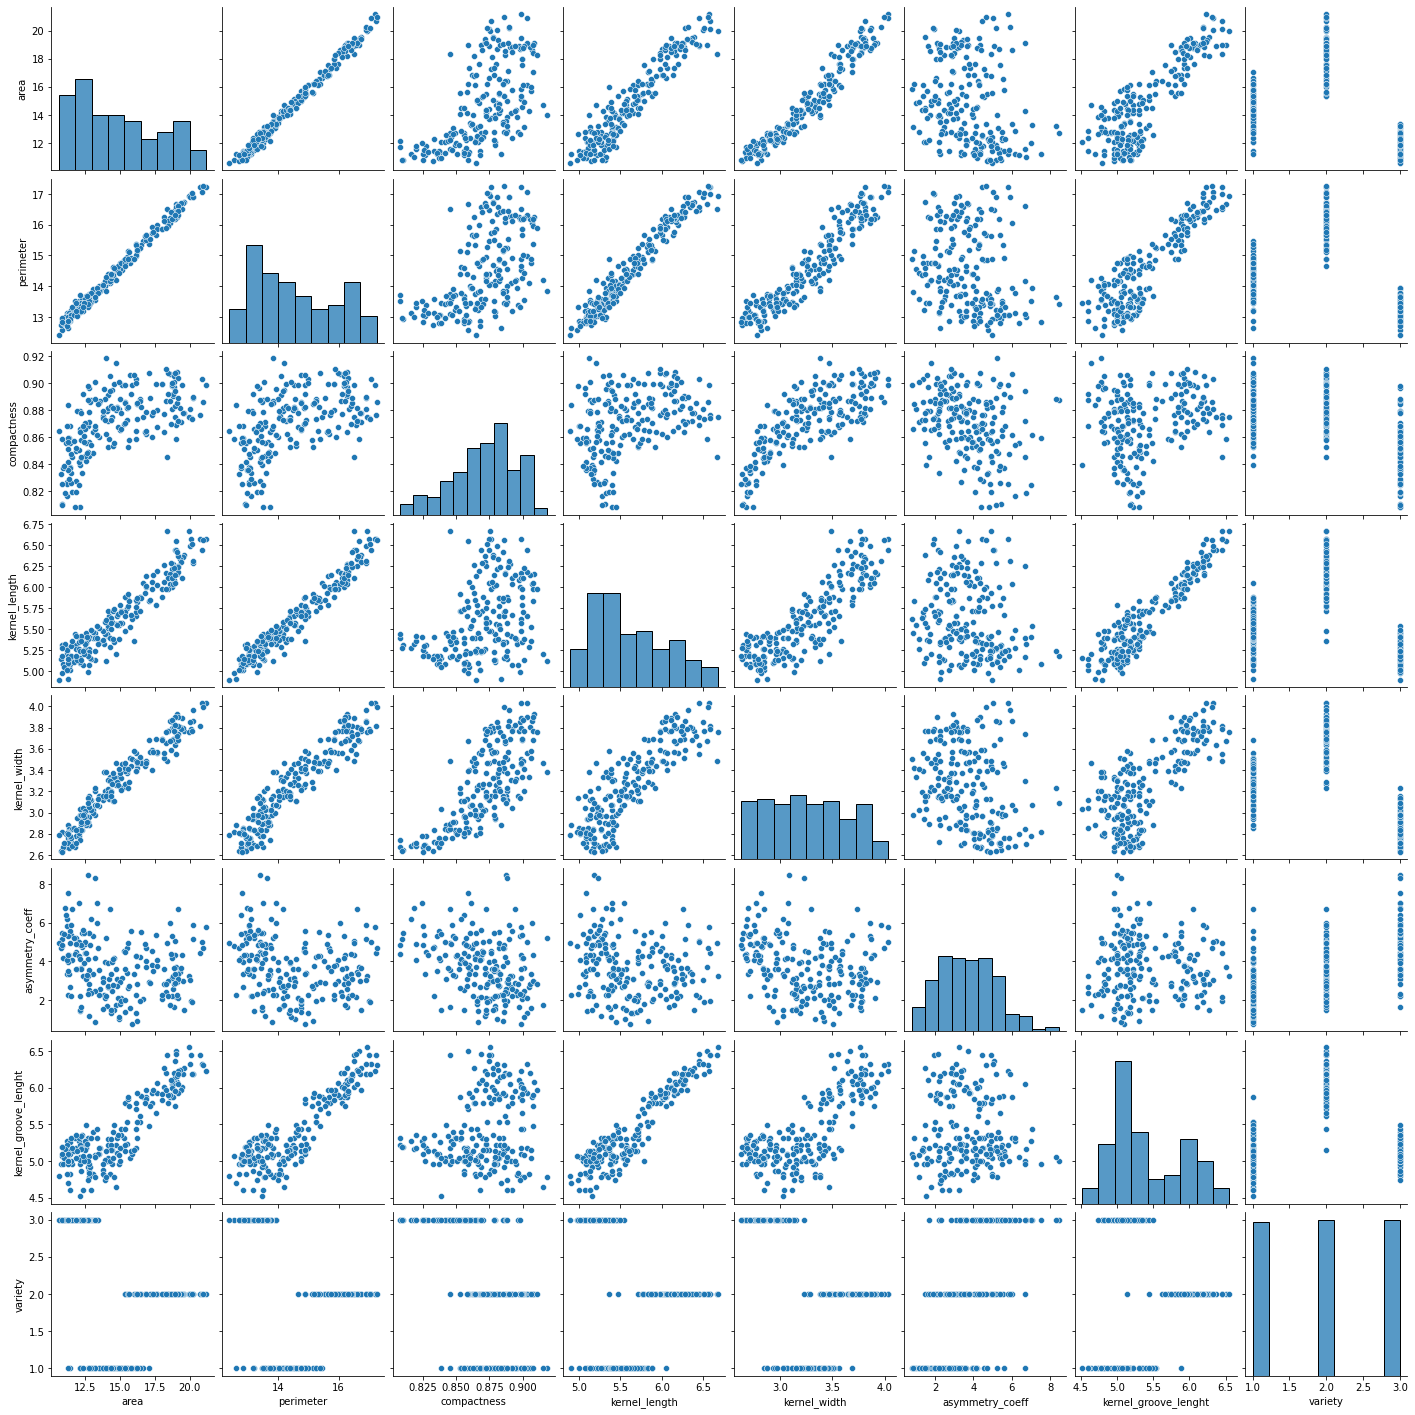

In [6]:
sns.pairplot(data);

In [7]:
X = data.drop(["variety"], axis=1)
y = data.variety

In [8]:
X.shape

(209, 7)

•	Scale the data using an appropriate scaler<br>

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

X_scaled = StandardScaler().fit_transform(X)

•	Conduct a principal component analysis<br>

In [10]:
from sklearn.decomposition import PCA

for n in range(1, len(X.columns)):
    target_number_of_components = n

    pca = PCA(n_components=target_number_of_components)
    pca.fit(X_scaled)
    print(f"Total variance accounted using {n} components: {round(pca.explained_variance_ratio_.sum(),4)*100}%")

print(f"Total variance accounted using all components: {round(PCA(n_components=None).fit(X_scaled).explained_variance_ratio_.sum(),4)*100}%")

Total variance accounted using 1 components: 71.89%
Total variance accounted using 2 components: 89.0%
Total variance accounted using 3 components: 98.68%
Total variance accounted using 4 components: 99.65%
Total variance accounted using 5 components: 99.91%
Total variance accounted using 6 components: 99.99%
Total variance accounted using all components: 100.0%


Using 3 componenents, we can account for 98.68% of the total variance. That is sufficient for me. Adding a 4th component adds slightly less than 1% (0.00965233). The added complexity of a 4th component does not seem to be a good trade.

In [11]:
target_number_of_components = 3

pca = PCA(n_components=target_number_of_components)
pca.fit(X_scaled)
pca.explained_variance_ratio_

array([0.71891235, 0.17109245, 0.09679935])

In [12]:
pca_transformed = pca.transform(X_scaled)

In [13]:
X_princ = pd.DataFrame(data=pca_transformed, columns = ["PC1", "PC2", "PC3"])
df_princ = pd.concat([X_princ, y], axis = 1)
df_princ = X_princ

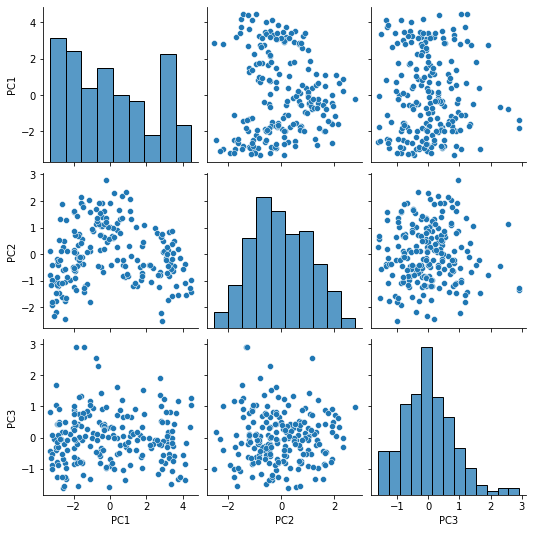

In [14]:
sns.pairplot(data=df_princ);

•	Construct a dendrogram using agglomerative clustering to see how many clusters will be optimal to specify in the kmeans clustering.<br>

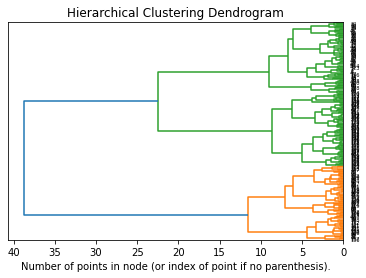

In [15]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sc

clusters = AgglomerativeClustering().fit(X)

sc.dendrogram(sc.linkage(df_princ, method='ward'), orientation='left')

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

I can make an arguement for 2 or 3. For now, I am choosing simplicity over complexity, so I am going for 3.

In [16]:
optimal_clusters = 2

Implement a kmeans clustering to find the clusters in the data<br>

Predict the clusters<br>

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(X_princ)
centroids = kmeans.cluster_centers_

•	Visualize the clusters<br>

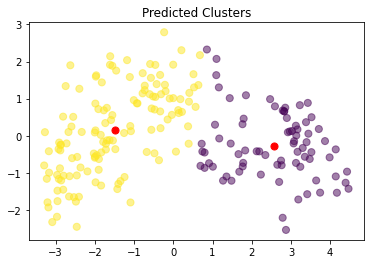

In [18]:
plt.scatter(X_princ["PC1"], X_princ["PC2"], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title("Predicted Clusters")
plt.show()

•	Also use a loop and a plot to tune the number of clusters.

In [19]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_princ)
    distortions.append(kmeanModel.inertia_)

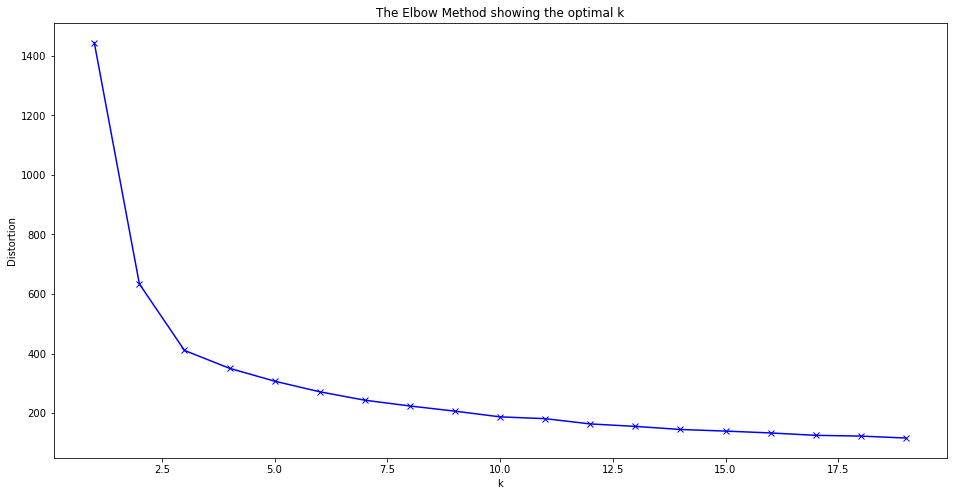

In [20]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Does the number of clusters obtain parallel the number of clusters obtained using the dendrogram?<br>

This graph indicates that 2 is too low and that 3 may be more appropriate. Because we know the data, we can confirm this to be the case.

•	Add the cluster values to your original dataset to be the labels<br>

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_princ)
data["k_label"] = kmeans.labels_
centroids = kmeans.cluster_centers_

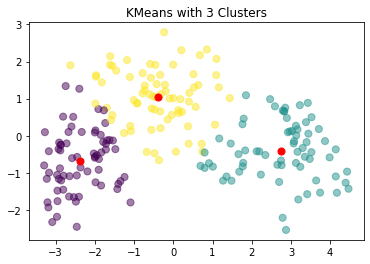

In [22]:
plt.scatter(X_princ["PC1"], X_princ["PC2"], c=data.k_label.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title("KMeans with 3 Clusters")
plt.show()

•	Using tools in sklearn, run a logistic regression on the original dataset with new labels to classify cases into the clusters or labels.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_log = data.drop(["variety", "k_label"], axis=1)
y_log = data.k_label

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, train_size=.80, random_state=42)

log_reg = LogisticRegression(max_iter=10000, random_state=42).fit(X_log_train, y_log_train)
print(f"Training Score: {log_reg.score(X_log_train, y_log_train)}")
print(f"Test Score: {log_reg.score(X_log_test, y_log_test)}")

Training Score: 0.9700598802395209
Test Score: 0.9523809523809523


•	Tune the cutoff value, c, of the logistic regression constructor in sklearn and plot the error rates and the corresponding settings of c. note that the cutoff c ranges from 0 to 1.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

tune_pipeline = Pipeline([("logistic_reg", LogisticRegression(max_iter=10000,
                                                              random_state=42))])

param_grid = {"logistic_reg__C": np.logspace(0, 1, num=40)}

grid_search = GridSearchCV(tune_pipeline,
                           param_grid, cv=5,
                           scoring="accuracy",
                           return_train_score=True)

grid_search.fit(X_log_train, y_log_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('logistic_reg',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42))]),
             param_grid={'logistic_reg__C': array([ 1.        ,  1.06081836,  1.12533558,  1.19377664,  1.26638017,
        1.34339933,  1.42510267,  1.51177507,  1.60371874,  1.70125428,
        1.80472177,  1.91448198,  2.03091762,  2.15443469,  2.28546386,
        2.42446202,  2.57191381,  2.72833338,  2.89426612,  3.07029063,
        3.25702066,  3.45510729,  3.66524124,  3.88815518,  4.12462638,
        4.37547938,  4.64158883,  4.92388263,  5.22334507,  5.54102033,
        5.87801607,  6.23550734,  6.61474064,  7.01703829,  7.44380301,
        7.89652287,  8.3767764 ,  8.88623816,  9.42668455, 10.        ])},
             return_train_score=True, scoring='accuracy')

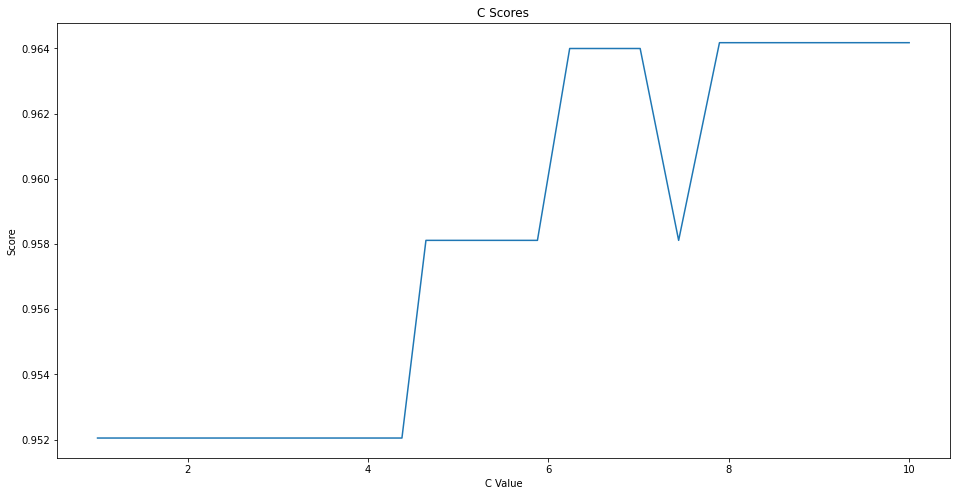

In [25]:
plt.figure(figsize=(16,8))
plt.plot(np.logspace(0, 1, num=40), grid_search.cv_results_['mean_test_score'])
plt.ylabel('Score')
plt.xlabel('C Value')
plt.title('C Scores')
plt.show()

In [26]:
best_est = grid_search.best_estimator_
best_est

Pipeline(steps=[('logistic_reg',
                 LogisticRegression(C=7.896522868499725, max_iter=10000,
                                    random_state=42))])

In [27]:
grid_search.best_params_

{'logistic_reg__C': 7.896522868499725}

•	Use the optimal cut off to compute the accuracy of your logistic regression.<br>

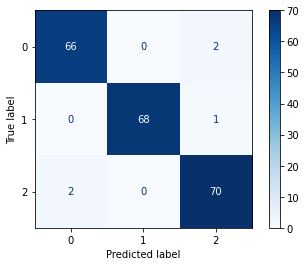

In [28]:
from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(grid_search, X_log, y_log, cmap=plt.cm.Blues)
plt.show()

In [29]:
y_log_train_pred = best_est.predict(X_log_train)
print(classification_report(y_log_train, y_log_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       1.00      1.00      1.00        54
           2       0.98      0.98      0.98        61

    accuracy                           0.99       167
   macro avg       0.99      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167



In [30]:
print(f"Training Score: {best_est.score(X_log_train, y_log_train)}")
print(f"Test Score: {best_est.score(X_log_test, y_log_test)}")

Training Score: 0.9880239520958084
Test Score: 0.9285714285714286


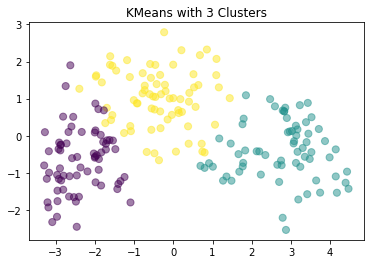

In [31]:
y_log_pred = best_est.predict(X_log)
plt.scatter(X_princ["PC1"], X_princ["PC2"], c=y_log_pred.astype(int), s=50, alpha=0.5)
plt.title("KMeans with 3 Clusters")
plt.show()

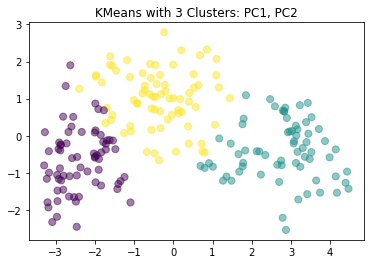

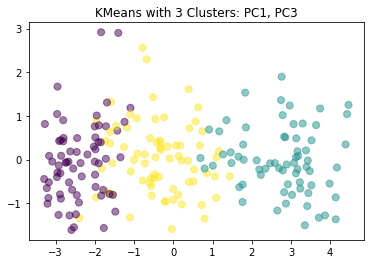

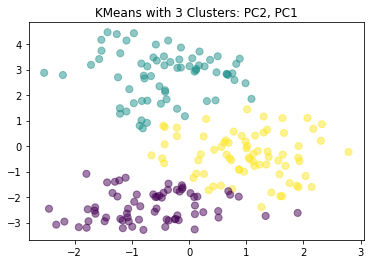

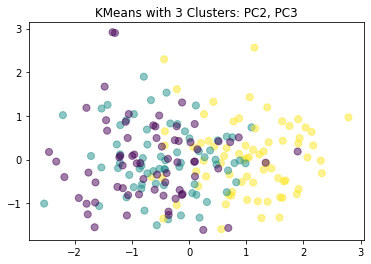

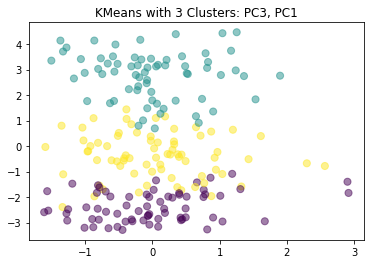

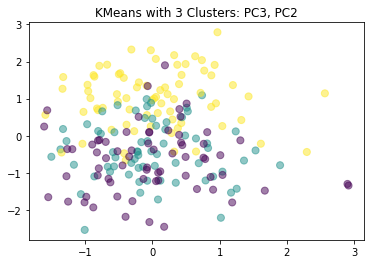

In [37]:
for p in ['PC1', 'PC2', 'PC3']:
    for c in ['PC1', 'PC2', 'PC3']:
        if p != c:
            plt.scatter(X_princ[p], X_princ[c], c=y_log_pred.astype(float), s=50, alpha=0.5)
            plt.title(f"KMeans with 3 Clusters: {p}, {c}")
            plt.show()

Using the predicted clusters from the Logistic Regression, we can plot the clusters. Plots using PC1 give the clearest separation of the clusters, with PC1 and PC2 giving the best representation, at least for a 2D cluster plot.

•	Do you think the clustering algorithm found good clusters that can be used for classification?

Yes, the algorithm found very good clusters for the data to 98% accuracy.

•	Try if you can interpret or describe what the clusters represent based on the pattern of values in the data set and the cluster. For example, if the data was only age and income, maybe clusters one is young and richer, cluster two may be rich seniors and cluster three are poor youths. Your visualization can also help with this interpretation.

In [33]:
cluster1 = data[data["k_label"]==0]
cluster2 = data[data["k_label"]==1]
cluster3 = data[data["k_label"]==2]

In [34]:
cluster1.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_lenght,variety,k_label
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0
mean,11.827353,13.245588,0.846440,5.236647,2.839868,4.801794,5.113956,2.882353,0.0
std,0.701448,0.349282,0.018945,0.138022,0.134726,1.351338,0.178961,0.474087,0.0
min,10.590000,12.410000,0.808100,4.899000,2.630000,1.502000,4.519000,1.000000,0.0
25%,11.255000,12.992500,0.833450,5.143750,2.718500,4.050250,5.002000,3.000000,0.0
50%,11.815000,13.250000,0.847650,5.231000,2.827000,4.839000,5.112000,3.000000,0.0
75%,12.372500,13.482500,0.859450,5.337250,2.954750,5.469750,5.239000,3.000000,0.0
max,13.340000,13.950000,0.888300,5.541000,3.232000,8.456000,5.491000,3.000000,0.0


In [35]:
cluster2.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_lenght,variety,k_label
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.0
mean,18.407826,16.169275,0.883557,6.167754,3.684551,3.630014,6.035768,1.971014,1.0
std,1.357892,0.574398,0.015260,0.238826,0.180258,1.203374,0.228908,0.168995,0.0
min,15.380000,14.890000,0.845200,5.718000,3.231000,1.472000,5.484000,1.000000,1.0
25%,17.360000,15.760000,0.873500,5.998000,3.561000,2.843000,5.879000,2.000000,1.0
50%,18.720000,16.220000,0.882300,6.152000,3.694000,3.619000,5.992000,2.000000,1.0
75%,19.140000,16.570000,0.897700,6.315000,3.806000,4.451000,6.188000,2.000000,1.0
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,2.000000,1.0


In [36]:
cluster3.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_lenght,variety,k_label
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0
mean,14.282222,14.253194,0.882158,5.480028,3.245139,2.747614,5.086917,1.208333,2.0
std,1.144829,0.566859,0.014989,0.230171,0.165055,1.194359,0.244537,0.579886,0.0
min,11.230000,12.630000,0.852900,4.902000,2.879000,0.765100,4.605000,1.000000,2.0
25%,13.530000,13.850000,0.872350,5.351000,3.133500,1.960000,4.903500,1.000000,2.0
50%,14.335000,14.285000,0.882000,5.510000,3.231500,2.693500,5.091000,1.000000,2.0
75%,15.035000,14.672500,0.892825,5.659000,3.377500,3.382750,5.222500,1.000000,2.0
max,16.440000,15.270000,0.918300,5.884000,3.582000,6.685000,5.752000,3.000000,2.0


Judging by the pairplot at the beginning, I would judget the components to be in the group of area, perimeter, kernal length or width. The pairplot only gives the relationship among those, but they are indicative of each other well. 

Likewise, using the descriptions from the clusters and the original data, we can see patterns and variance from those 4 data points.

Large, medium, and small area tend to be the clusters. The area and perimeter are somewhat tied together. The kernal size follows that same pattern within those groupings.